In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv("datasets train/pekanbaru.csv")

In [3]:
df.head()

,created_at,text,tweet_en
0,Fri Apr 03 08:30:02 +0000 2015,#berita Kepada Dinas kesehatan Kota Pekanbaru ...,#berita To the Pekanbaru City Health Office He...
1,Mon Sep 09 04:02:35 +0000 2019,Kabut asap sangat pekat menyelimuti Kota Pekan...,The smog was very thick and covered the city o...
2,Wed Jan 10 11:09:08 +0000 2018,https://t.co/zfmclHoLR8 3 Dokter RSUD Pekanbar...,https://t.co/zfmclHoLR8 3 Doctors of Pekanbaru...
3,Mon Apr 29 15:07:27 +0000 2013,Dokter gigi yg bagus dan murah di kota pekanba...,A good and cheap dentist in the city of Pekanb...
4,Sun Oct 02 12:30:38 +0000 2016,PEKANBARU - Capaian indeks pembangunan manusia...,PEKANBARU - Achievement of the Human Developme...


In [4]:
def getSubjectivity(text):
    c = str(text)
    return TextBlob(c).sentiment.subjectivity

def getPolarity(text):
    c = str(text)
    return TextBlob(c).sentiment.polarity

df['Subjectivity'] = df['tweet_en'].apply(getSubjectivity)
df['Polarity'] = df['tweet_en'].apply(getPolarity)

In [5]:
df

,created_at,text,tweet_en,Subjectivity,Polarity
0,Fri Apr 03 08:30:02 +0000 2015,#berita Kepada Dinas kesehatan Kota Pekanbaru ...,#berita To the Pekanbaru City Health Office He...,0.200000,0.200
1,Mon Sep 09 04:02:35 +0000 2019,Kabut asap sangat pekat menyelimuti Kota Pekan...,The smog was very thick and covered the city o...,0.808750,-0.455
2,Wed Jan 10 11:09:08 +0000 2018,https://t.co/zfmclHoLR8 3 Dokter RSUD Pekanbar...,https://t.co/zfmclHoLR8 3 Doctors of Pekanbaru...,0.000000,0.000
3,Mon Apr 29 15:07:27 +0000 2013,Dokter gigi yg bagus dan murah di kota pekanba...,A good and cheap dentist in the city of Pekanb...,0.650000,0.550
4,Sun Oct 02 12:30:38 +0000 2016,PEKANBARU - Capaian indeks pembangunan manusia...,PEKANBARU - Achievement of the Human Developme...,0.100000,0.000
...,...,...,...,...,...
381,Mon May 07 16:45:55 +0000 2018,Kota Pekanbaru memiliki beberapa rumah sakit y...,Pekanbaru City has several hospitals that are ...,0.187500,0.000
382,Tue Apr 24 14:53:31 +0000 2018,RSUD Tengku Rafian Siak Menuju Akreditasi SNAR...,Tengku Rafian Siak Hospital Towards SNARS Accr...,0.000000,0.000
383,Sat Sep 20 04:19:26 +0000 2014,Last day! Ã¢Â€Â” di Puskesmas Harapan Raya Kot...,Last day! Ã ¢ Â € Â ”at Puskesmas Harapan Raya...,0.066667,0.000
384,Mon Nov 24 03:32:29 +0000 2014,"""@Kota_Pekanbaru: Bergelut dengan Geng Motor, ...",@Kota_Pekanbaru: Wrestling with Motorcycle Gan...,0.800000,0.000


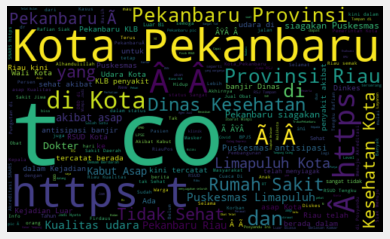

In [6]:
#wordcloud
allwords = ' '.join([twts for twts in df['text']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allwords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [7]:
def getAnalysis(score):
    if score < 0 :
        return 'Negative'
    elif score == 0 :
        return 'Neutral'
    else :
        return 'Positive'

df['Sentiment'] = df['Polarity'].apply(getAnalysis)

df

,created_at,text,tweet_en,Subjectivity,Polarity,Sentiment
0,Fri Apr 03 08:30:02 +0000 2015,#berita Kepada Dinas kesehatan Kota Pekanbaru ...,#berita To the Pekanbaru City Health Office He...,0.200000,0.200,Positive
1,Mon Sep 09 04:02:35 +0000 2019,Kabut asap sangat pekat menyelimuti Kota Pekan...,The smog was very thick and covered the city o...,0.808750,-0.455,Negative
2,Wed Jan 10 11:09:08 +0000 2018,https://t.co/zfmclHoLR8 3 Dokter RSUD Pekanbar...,https://t.co/zfmclHoLR8 3 Doctors of Pekanbaru...,0.000000,0.000,Neutral
3,Mon Apr 29 15:07:27 +0000 2013,Dokter gigi yg bagus dan murah di kota pekanba...,A good and cheap dentist in the city of Pekanb...,0.650000,0.550,Positive
4,Sun Oct 02 12:30:38 +0000 2016,PEKANBARU - Capaian indeks pembangunan manusia...,PEKANBARU - Achievement of the Human Developme...,0.100000,0.000,Neutral
...,...,...,...,...,...,...
381,Mon May 07 16:45:55 +0000 2018,Kota Pekanbaru memiliki beberapa rumah sakit y...,Pekanbaru City has several hospitals that are ...,0.187500,0.000,Neutral
382,Tue Apr 24 14:53:31 +0000 2018,RSUD Tengku Rafian Siak Menuju Akreditasi SNAR...,Tengku Rafian Siak Hospital Towards SNARS Accr...,0.000000,0.000,Neutral
383,Sat Sep 20 04:19:26 +0000 2014,Last day! Ã¢Â€Â” di Puskesmas Harapan Raya Kot...,Last day! Ã ¢ Â € Â ”at Puskesmas Harapan Raya...,0.066667,0.000,Neutral
384,Mon Nov 24 03:32:29 +0000 2014,"""@Kota_Pekanbaru: Bergelut dengan Geng Motor, ...",@Kota_Pekanbaru: Wrestling with Motorcycle Gan...,0.800000,0.000,Neutral


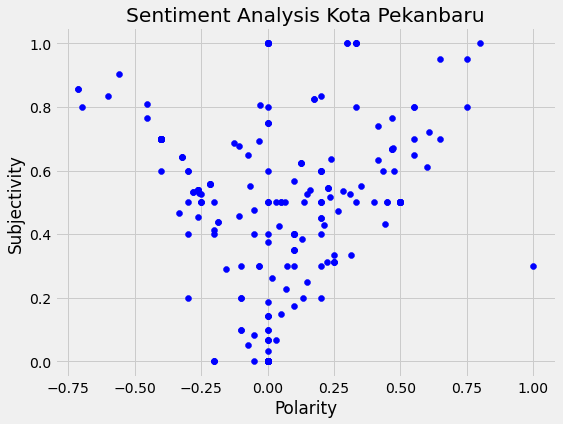

In [8]:
#plot the polarity and subjectivity
plt.figure(figsize =(8,6))
for i in range (0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')

plt.title("Sentiment Analysis Kota Pekanbaru")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

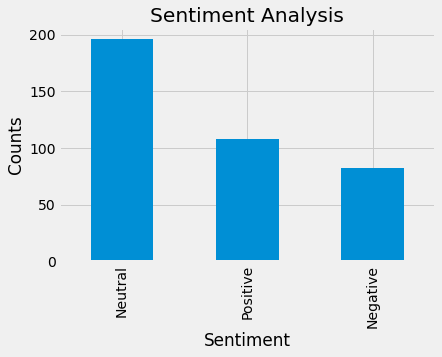

In [9]:
#Plot the sentiment
df['Sentiment'].value_counts()

plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
df['Sentiment'].value_counts().plot(kind = "bar")
plt.show()

In [10]:
df_final = df[['created_at', 'text', 'Subjectivity', 'Polarity', 'Sentiment']]
df_final

,created_at,text,Subjectivity,Polarity,Sentiment
0,Fri Apr 03 08:30:02 +0000 2015,#berita Kepada Dinas kesehatan Kota Pekanbaru ...,0.200000,0.200,Positive
1,Mon Sep 09 04:02:35 +0000 2019,Kabut asap sangat pekat menyelimuti Kota Pekan...,0.808750,-0.455,Negative
2,Wed Jan 10 11:09:08 +0000 2018,https://t.co/zfmclHoLR8 3 Dokter RSUD Pekanbar...,0.000000,0.000,Neutral
3,Mon Apr 29 15:07:27 +0000 2013,Dokter gigi yg bagus dan murah di kota pekanba...,0.650000,0.550,Positive
4,Sun Oct 02 12:30:38 +0000 2016,PEKANBARU - Capaian indeks pembangunan manusia...,0.100000,0.000,Neutral
...,...,...,...,...,...
381,Mon May 07 16:45:55 +0000 2018,Kota Pekanbaru memiliki beberapa rumah sakit y...,0.187500,0.000,Neutral
382,Tue Apr 24 14:53:31 +0000 2018,RSUD Tengku Rafian Siak Menuju Akreditasi SNAR...,0.000000,0.000,Neutral
383,Sat Sep 20 04:19:26 +0000 2014,Last day! Ã¢Â€Â” di Puskesmas Harapan Raya Kot...,0.066667,0.000,Neutral
384,Mon Nov 24 03:32:29 +0000 2014,"""@Kota_Pekanbaru: Bergelut dengan Geng Motor, ...",0.800000,0.000,Neutral
